### **INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

### [**CAT AND DOG CLASSIFICATION**](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb)
- I will download and extract a dataset called the [**Oxford-IIIT Pet Dataset**](https://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7349 images of cats and dogs from 37 breeds from the fast.ai datasets collection to the GPU server. I will use pretrained model that has already been trained on 1.3 million images. The pretrained model will be fine tuned using the latest advances in transfer learning to create a model that is specially customized for recognizing dogs and cats. 

In [4]:
#@ DEPENDENCIES AND DATASET: 
from fastai.vision.all import *                           # Getting all Libraries. 
PATH = untar_data(URLs.PETS)/"images"                     # Path to the Images of Pets. 

In [5]:
#@ PREPARING THE DATASET: 
def is_cat(x):                                            # Function for Recognizing Cats. 
  return x[0].isupper()                                   # Inspecting Uppercase. 
#@ INITIALIZING DATALOADERS: 
dls = ImageDataLoaders.from_name_func(                    # Initializing DataLoaders. 
      PATH, get_image_files(PATH), valid_pct=0.2,         # Getting Image Files. 
      seed=42, label_func=is_cat,                         # Function for Labels. 
      item_tfms=Resize(224))                              # Resizing the Images. 

In [7]:
#@ TRAINING THE MODEL: 
learn = cnn_learner(dls, resnet34,                        # Using Pretrained RESNET Model. 
                    metrics=error_rate)                   # Building Convolutional Model. 
learn.fine_tune(1)                                        # Training the Model. 

epoch,train_loss,valid_loss,error_rate,time
0,0.113123,0.032392,0.010149,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.051291,0.022210,0.008796,00:55


- The error rate is less than 0.02 as show in the result above. 

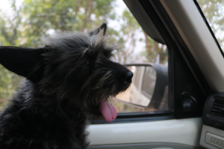

In [9]:
#@ INSPECTING DOG IMAGE: 
PATH = "/content/Bal.JPG"                       # Path to Image. 
img = PILImage.create(PATH)                     # Initializing Image. 
img.to_thumb(224)                               # Inspecting Image. 

In [12]:
#@ MODEL EVALUATION: 
is_cat, _, probs = learn.predict(img)               # Getting Predictions. 
print(f"Is this a cat?: {is_cat}.")
print(f"Probability: {probs[1].item():.6f}")

Is this a cat?: False.
Probability: 0.000080
